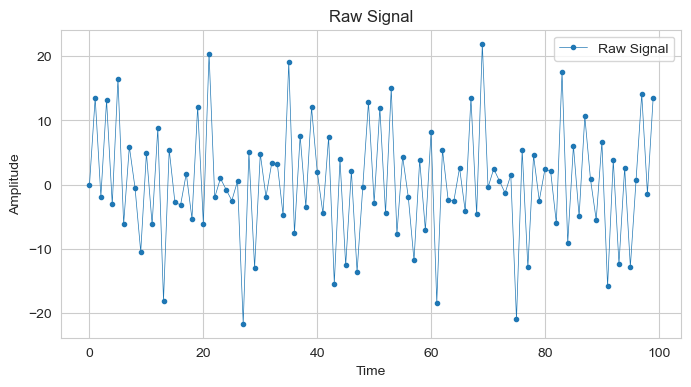

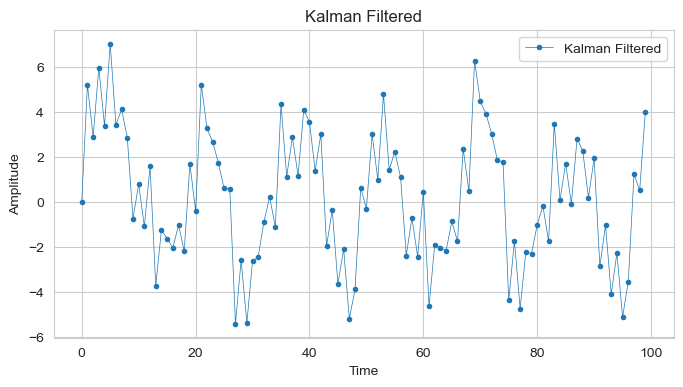

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style(style='whitegrid')

def plot_graph(input_array, title):
    plt.figure(figsize=(8, 4))
    plt.plot(input_array, marker='.', linewidth=0.5, label=title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_input_output(input_array, output_array, title):
    plt.figure(figsize=(8, 4))
    plt.plot(input_array, linewidth=0.5, label='Input')
    plt.plot(output_array, linewidth=0.5, label='Output')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.legend()
    plt.show()

sig_in = np.loadtxt('noise.csv', delimiter=',', dtype=float)[:100]
sig_out = np.loadtxt('kalman.csv', delimiter=',', dtype=float)[:100]

plot_graph(sig_in, "Raw Signal")
plot_graph(sig_out, "Kalman Filtered")

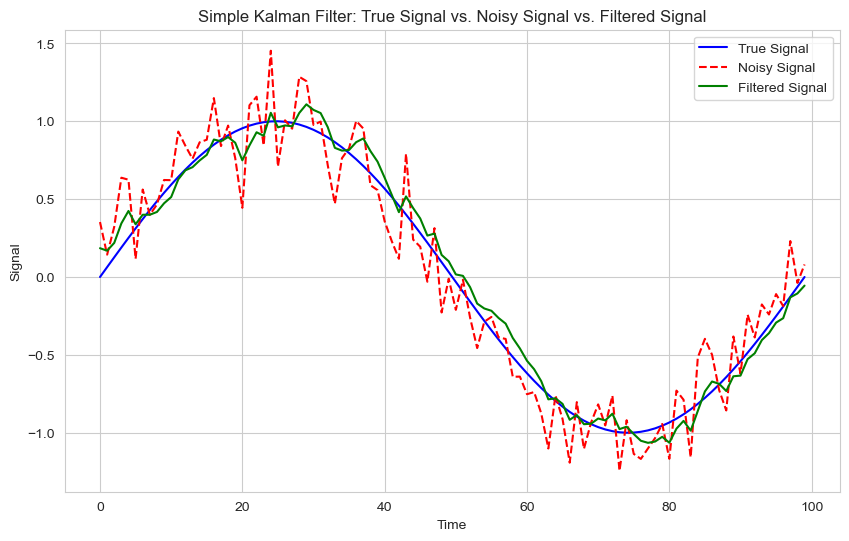

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def simple_kalman_filter(noisy_signal, process_noise=0.1, measurement_noise=1):
    # Initialize variables
    filtered_signal = np.zeros_like(noisy_signal)
    x_hat = 0  # Initial state estimate
    P = 1  # Initial state covariance
    Q = process_noise  # Process noise covariance
    R = measurement_noise  # Measurement noise covariance

    # Kalman filtering
    for t in range(len(noisy_signal)):
        # Prediction step
        x_hat_minus = x_hat
        P_minus = P + Q

        # Update step
        K = P_minus / (P_minus + R)
        x_hat = x_hat_minus + K * (noisy_signal[t] - x_hat_minus)
        P = (1 - K) * P_minus

        # Save filtered signal
        filtered_signal[t] = x_hat

    return filtered_signal

# Generate example noisy signal
np.random.seed(0)
num_steps = 100
true_signal = np.sin(np.linspace(0, 2*np.pi, num_steps))  # True underlying signal
noise = np.random.normal(0, 0.2, num_steps)  # Gaussian noise
noisy_signal = true_signal + noise  # Noisy signal (true signal + noise)

# Apply simple Kalman filter
filtered_signal = simple_kalman_filter(noisy_signal)

# Plot comparison graph
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, num_steps), true_signal, label='True Signal', color='blue')
plt.plot(np.arange(0, num_steps), noisy_signal, label='Noisy Signal', color='red', linestyle='dashed')
plt.plot(np.arange(0, num_steps), filtered_signal, label='Filtered Signal', color='green')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Simple Kalman Filter: True Signal vs. Noisy Signal vs. Filtered Signal')
plt.legend()
plt.grid(True)
plt.show()
